# Exploration of Collider Bias with discrete Bayes Nets (in Julia, using `BayesNets.jl`)

In [1]:
using BayesNets

## Example: Does collider bias make it look like nicotine is protective of COVID?

![](img/bayes_net_1.png)

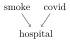

In [2]:
# TODO: understand order of CPD for the `tested` node
bn = DiscreteBayesNet()
push!(bn, DiscreteCPD(:smoke, [0.25,0.75]))
push!(bn, DiscreteCPD(:covid, [0.1,0.9]))
push!(bn, DiscreteCPD(:hospital, [:smoke, :covid], [2,2], 
        [Categorical([0.9,0.1]),
         Categorical([0.2,0.8]),
         Categorical([0.7,0.3]),
         Categorical([0.01,0.99]),
        ]))

In [3]:
table(bn, :smoke)

,smoke,p
,Int64,Float64
1,1,0.25
2,2,0.75


In [4]:
table(bn, :covid)

,covid,p
,Int64,Float64
1,1,0.1
2,2,0.9


In [5]:
table(bn, :hospital)

,smoke,covid,hospital,p
,Int64,Int64,Int64,Float64
1,1,1,1,0.9
2,2,1,1,0.2
3,1,2,1,0.7
4,2,2,1,0.01
5,1,1,2,0.1
6,2,1,2,0.8
7,1,2,2,0.3
8,2,2,2,0.99


## Condition upon `hospital==2`

In [6]:
ϕ = infer(bn, :smoke, evidence=Assignment(:hospital=>2))

,smoke,potential
,Int64,Float64
1,1,0.0876918
2,2,0.912308


┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = convert(::Type{DataFrame}, ::Factor) at factors_dataframes.jl:12
└ @ BayesNets /Users/btvincent/.julia/packages/BayesNets/XwVs4/src/Factors/factors_dataframes.jl:12


## Can you name levels of nodes?

In [9]:
# How I guess it should work, but it doesn't

bn2 = DiscreteBayesNet()
push!(bn2, DiscreteCPD(:smoke, NamedCategorical([:yes, :no], [0.25, 0.75])))
push!(bn2, DiscreteCPD(:covid, NamedCategorical([:yes, :no], [0.1, 0.9])))
push!(bn2, DiscreteCPD(:hospital, [:smoke, :covid], [2,2], 
        [NamedCategorical([:yes, :no], [0.9, 0.1]),
         NamedCategorical([:yes, :no], [0.2, 0.8]),
         NamedCategorical([:yes, :no], [0.7, 0.3]),
         NamedCategorical([:yes, :no], [0.01, 0.99])]))

MethodError: MethodError: no method matching CategoricalCPD{DiscreteNonParametric{Int64,Float64,Base.OneTo{Int64},Array{Float64,1}}}(::Symbol, ::NamedCategorical{Symbol})
Closest candidates are:
  CategoricalCPD{DiscreteNonParametric{Int64,Float64,Base.OneTo{Int64},Array{Float64,1}}}(::Any, ::Any, !Matched::Any, !Matched::Any) where D at /Users/btvincent/.julia/packages/BayesNets/XwVs4/src/CPDs/categorical_cpd.jl:22
  CategoricalCPD{DiscreteNonParametric{Int64,Float64,Base.OneTo{Int64},Array{Float64,1}}}(::Symbol, !Matched::AbstractArray{T,1}) where T<:Real at /Users/btvincent/.julia/packages/BayesNets/XwVs4/src/CPDs/categorical_cpd.jl:107

In [10]:
ϕ = infer(bn2, :smoke, evidence=Assignment(:hospital=>2))

ArgumentError: ArgumentError: Query smoke is not in the probabilistic graphical model